# Predicting Heart disease using machine learning

This notebook looks into using various Pyhon bases machine learning and Data Science libraries in an attempt to build a 
machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

We're going to take th efoloowing approach:
1. Problem Defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defination

In a statement ,
> Given clinical parameters of a patient ,  can we predict whether or not they have a heart disease?


## 2. Data

The original data came from the Cleaveland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease
    
There is also a version of it available on Kaggle:- https://www.kaggle.com/ronitf/heart-disease-uci

        
## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has a heart disease during the proof of concept ,
we'll persue the project.


## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
      * 0: Typical angina: chest pain related decrease blood supply to the heart
      * 1: Atypical angina: chest pain not related to heart
      * 2: Non-anginal pain: typically esophageal spasms (non heart related)
      * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
      * serum = LDL + HDL + .2 * triglycerides
      * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
      * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
      * 0: Nothing to note
      * 1: ST-T Wave abnormality
         * can range from mild symptoms to severe problems
         * signals non-normal heart beat
      * 2: Possible or definite left ventricular hypertrophy
         * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
       * 0: Upsloping: better heart rate with excercise (uncommon)
       * 1: Flatsloping: minimal change (typical healthy heart)
       * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
       * colored vessel means the doctor can see the blood passing through
       * the more blood movement the better (no clots)
13. thal - thalium stress result
       * 1,3: normal
       * 6: fixed defect: used to be defect but ok now
       * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools
We're going to use pandas, numpy and Matplotlib for data analysis and manipulation



In [1]:
# Import all the tools we need 

# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plot to appear inside the notebook
%matplotlib inline  

# Import models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score ,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# Load the data
df = pd.read_csv("heart-disease (1).csv")
df.shape # (rows , columns)

(303, 14)

## Data exploration (explaratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset we are working with

1. What questions are we trying to solve?
2. What kind of data we have and how we treat different types?
3. What's missing from the data and how to dea with it??
4. Where are the outliers and why we care about them?
5. How can we add , change or remove features to get more out of our data?


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.sex

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64

In [6]:
df["target"].value_counts()


1    165
0    138
Name: target, dtype: int64

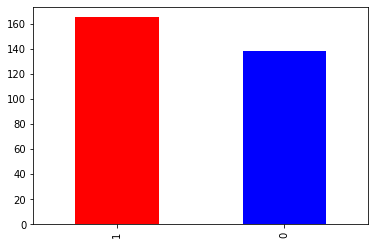

In [7]:
df["target"].value_counts().plot(kind = "bar",color = ["red","blue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing values??
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to Sex


In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare the target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


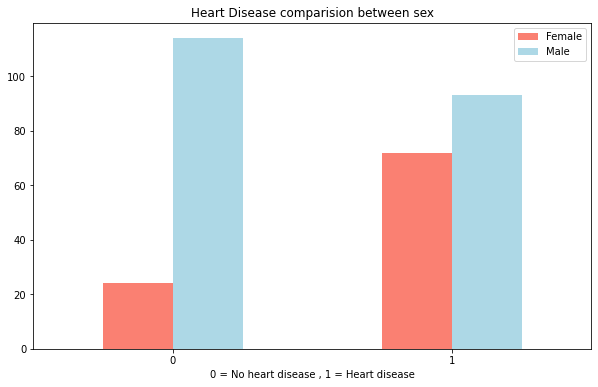

In [13]:
# Create a plot of the cross tab
pd.crosstab(df.target,df.sex).plot(kind = "bar" , figsize = (10,6),
                                  color = ["salmon","lightblue"]);
plt.title("Heart Disease comparision between sex")
plt.xlabel("0 = No heart disease , 1 = Heart disease");
plt.legend(["Female","Male"])
plt.xticks(rotation = 0); # For xlables
plt.yticks(rotation = 0);

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

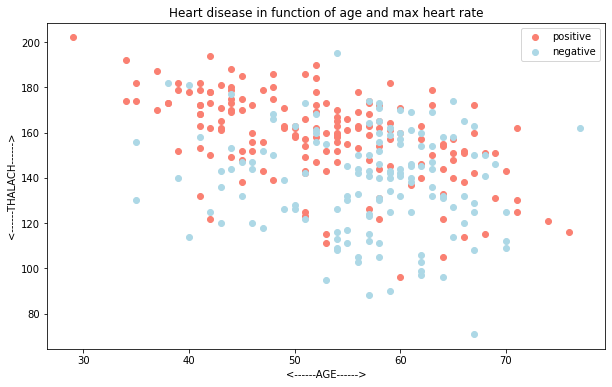

In [16]:
### Age vs.Max heart rate(thalach) for heart disease

plt.figure(figsize =(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],color = "salmon");
# Scatter with negative example
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color = "lightblue");

# Add some useful info
plt.title ( "Heart disease in function of age and max heart rate")
plt.legend(["positive","negative"]);
plt.xlabel("<------AGE------>")
plt.ylabel("<------THALACH------>");
# plt.axhline()

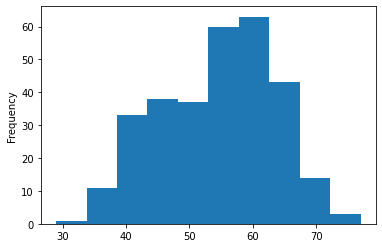

In [17]:
df.age.plot.hist();

### Heart disease frequency per chest pain type

3. cp - chest pain type
      * 0: Typical angina: chest pain related decrease blood supply to the heart
      * 1: Atypical angina: chest pain not related to heart
      * 2: Non-anginal pain: typically esophageal spasms (non heart related)
      * 3: Asymptomatic: chest pain not showing signs of disease

In [18]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


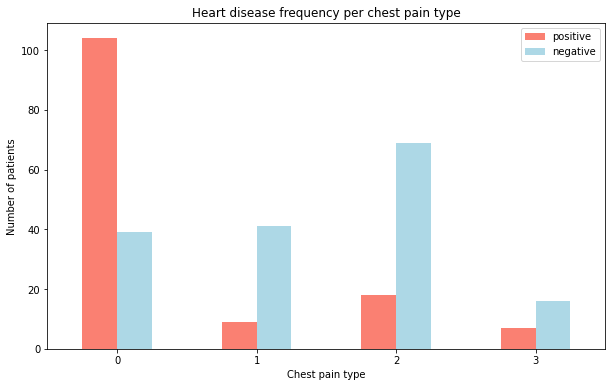

In [19]:
# Make the cross tab more visual

pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),
                                 color = ["salmon","lightblue"])

# Add some communication
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Number of patients")
plt.legend(["positive","negative"])
plt.xticks(rotation = 0);


In [20]:
# Make a corelational matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


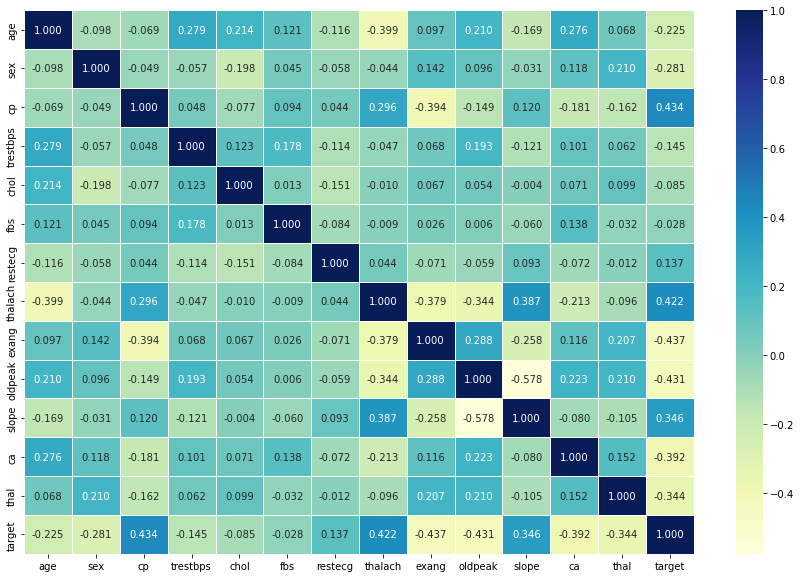

In [21]:
# Let's make the corelational matrix prettier (using seaborn heat map)
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths=0.5,
                fmt=".3f",
                cmap = "YlGnBu");
# bottom , top = ax.get_ylim()
# ax.set_ylim(bottom+0.5 , top-0.5); # Not required for latest version

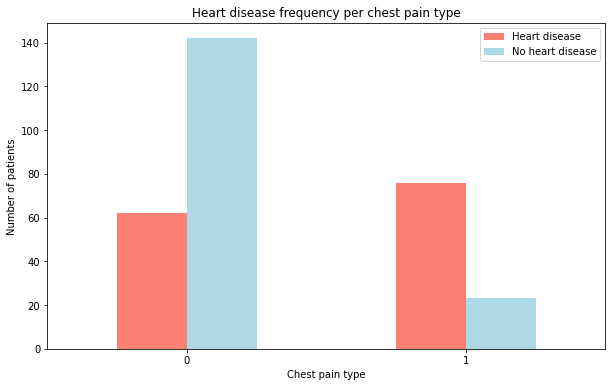

In [22]:
# Make the cross tab more visual

pd.crosstab(df.exang,df.target).plot(kind="bar",figsize=(10,6),
                                 color = ["salmon","lightblue"])

# Add some communication
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Number of patients")
plt.legend(["Heart disease","No heart disease"])
plt.xticks(rotation = 0);

## 5. Modelling

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# Split data into X and y
X = df.drop("target",axis = 1)
y = df["target"]

In [25]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [27]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test 
X_train , X_test , y_train , y_test = train_test_split(X,
                                                       y,
                                                       test_size = 0.2)



In [28]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [29]:
y_train , len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data into train and test sets,it's time to build a machine learning model.

We'll train it(find the patterns) on the training set.

And we'll test it(use the pattern) on the test set.

We're going to use 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours classification
3. Random Forest Classifier

In [30]:
# put models inside a dictionary
models = {"Logistic Regression":LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}


# Create a function to fit and score a model
def fit_and_score(models , X_train , X_test , y_train , y_test):
    """
    Fits and Evaluates given machine learning models:
    models: a dict of different sk-learn models
    X_train: training data (no labels)
    X_test: testing data(no lables)
    y_train: traning lables
    y_test: testing lables
    
    """
    # Set the random seed
    np.random.seed(42)
    
    # Make a dicionary to keep model score
    model_scores = {}
    
    for name,model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        
        # Evaluate each model and append its score to the model_scores
        model_scores[name] = model.score(X_test,y_test)
    
    return model_scores
    
    
    

In [31]:
model_scores  = fit_and_score(models = models,
                              X_train= X_train,
                             X_test= X_test,
                             y_train= y_train,
                             y_test= y_test)
model_scores

c:\Users\Hp\Desktop\ml-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparision

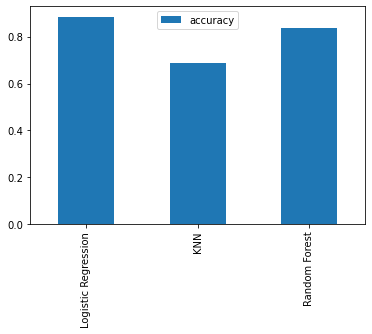

In [32]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Now we know our baseline model... and we know a model's first predictions aren't always what we should based our next steps
off.What should we do?

Let's look at the following: 
* Hyperparameter Tuning
* Feature Importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1-score
* ROC curve
* Area under the curve (AUC)

### Hyperparameter Tuning

#### By Hand

In [33]:
# Let's tune the KNN model
train_scores = []
test_scores = []


# Create a lsit of different values for n_neighbors
neighbors = range(1,21)

# Set up KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train,y_train)
    
    # Update training scores list 
    train_scores.append(knn.score(X_train,y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [34]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [35]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum value of test score id:75.41%


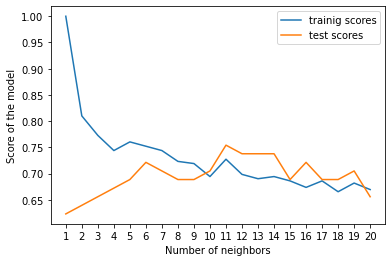

In [36]:
plt.plot(neighbors,train_scores,label = "trainig scores")
plt.plot(neighbors,test_scores,label = "test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Score of the model")
plt.legend();

print(f"Maximum value of test score id:{max(test_scores)*100:.2f}%")

#### By RandomizedSearchCV

We are going to tune:
* LogisticRegression ()
* RandomForestClassifier() 

In [37]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [38]:
# Create a hyparameter grid fro logistic regression
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}

# Create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":range(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

In [39]:
# Tune Logistics regression

np.random.seed(42)

# Set up random hyperparameter search for logistics Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [41]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we have tuned LOgidctic regression.

Now let's do it for RFC

In [42]:
# Let's set up the random seed
np.random.seed(42)

# Set up random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv = 5,
                          n_iter=20,
                          verbose=True)

# Fitting
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': range(10, 1000, 50)},
                   verbose=True)

In [43]:
# Find the best hyperparametrs 
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [44]:
# Evaluation after tuning
rs_rf.score(X_test,y_test)

0.8688524590163934

### GridSearchCV

Since teh LogisticRegression model provides the best scores so far we try to improive it using GridSearchCV

In [45]:
# Set up the grid
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}

# Setup grid hyperparameter search for Logisticregression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit our grid hyper parameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [46]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [47]:
# Evaluate
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier,beyond accuracy
* ROC curve and AUC curve
* Confusion matrix
* Classification matrix
* Precision
* Recall
* F1 score

.... and it would be great if cross validation was used where possible

To make comparision and evauate our trained model, we need to make prediction

In [48]:
# Make prediction with tuned model
y_preds = gs_log_reg.predict(X_test)

In [49]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [50]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

c:\Users\Hp\Desktop\ml-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


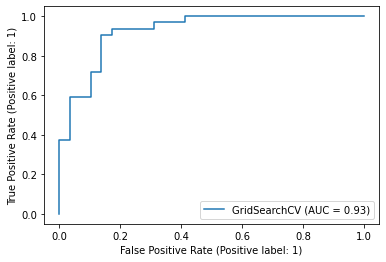

In [51]:
# Plot the ROC curve and calculate the AUC matrix
plot_roc_curve(gs_log_reg,X_test,y_test);

In [52]:
# COnfusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


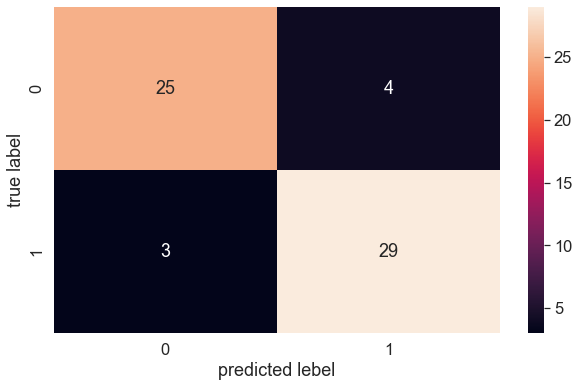

In [53]:
# Plot the confusion matrix 
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test , y_preds):
    """
    This fucntion plot the confusion matrix using seaborn's heatmap().
    """
    fig , ax= plt.subplots(figsize= (10,6))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=True)
    plt.xlabel("predicted lebel")
    plt.ylabel("true label")
    
plot_conf_mat(y_test,y_preds)

We have done ROC AUC and confusion. Let's  get a classification , precision,recall and f1 score

In [54]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculating the evaluation matrix using cross validation
We're going to calculate the precision ,  recall , f1-score of our model using cross-validation and to do that we will use 
cross_val_score()

In [55]:
# Checkk best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
# Create a new classifier using the best parameter
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")

In [57]:
# Function defination to evaluate our cross validation matrix

def cross_val_mat(clf,X,y):
    """
    This funciton evauates the cross validation matrix if a model
    """
    cv_acc = cross_val_score(clf,X,y,cv=5,scoring = "accuracy")
    metric={"Accuracy":np.mean(cv_acc)}
    
    cv_prec = cross_val_score(clf,X,y,cv=5,scoring = "precision")
    metric["Precision"]=np.mean(cv_prec)
    
    cv_recall =cross_val_score(clf,X,y,cv=5,scoring = "recall")
    metric["Recall"]=np.mean(cv_recall)
    
    cv_f1 = cross_val_score(clf,X,y,cv=5,scoring = "f1")
    metric["F1-score"]=np.mean(cv_f1)
    
    return metric
    
cross_val_mat(clf,X,y)

{'Accuracy': 0.8446994535519124,
 'Precision': 0.8207936507936507,
 'Recall': 0.9212121212121213,
 'F1-score': 0.8673007976269721}

In [58]:
# Cross validated accuratcy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [59]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [60]:
# Cross validated precision
cv_prec = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring = "precision")
cv_prec=np.mean(cv_prec)
cv_prec

0.8207936507936507

In [61]:
# Cross validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [62]:
# Cross validated f1-score

cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring = "f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

In [63]:
# Visualize our cross validate matrix
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_prec,
                          "Recall":cv_recall,
                          "F1-score":cv_f1},
                         index=["PERFOMANCE"])

In [64]:
cv_metrics

,Accuracy,Precision,Recall,F1-score
PERFOMANCE,0.844699,0.820794,0.921212,0.867301


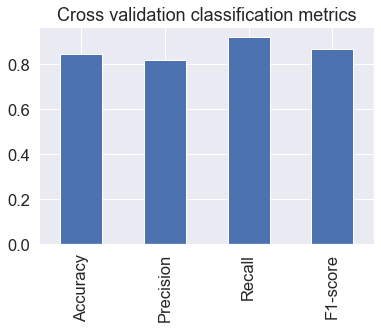

In [65]:
cv_metrics.T.plot.bar(title = "Cross validation classification metrics",
                     legend = False);

### Features Importance

Feature importance is another way of asking, "which features contributed most to the outcome of the model and how did they contributed?" 

Finding features importance is different for each machine learning model.

One way to find the features importance is to search : MODEL NAME -> Feature importance

Let's find the features importance for our Logistic Regression

In [66]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
# Fit the instance of Logistic Regression
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")

clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [68]:
# Check coefficient
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [69]:
# Match the coef_ of thefeatures to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

In [70]:
# Visualize
feature_df = pd.DataFrame(feature_dict,index=["values"])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
values,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


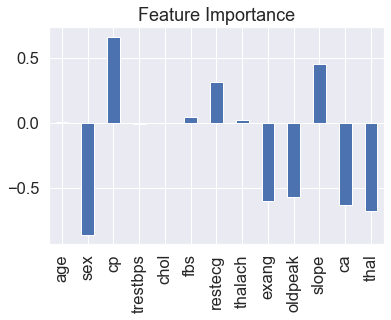

In [71]:
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [72]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
